# K-Nearest Neighbors

Table of contents

✔ Chapter 1.  k-NN

To install further python libraries, type

`!pip install --target=$my_path [LIBRARY_NAME]`

# Chapter 1-1. Implement from scratch


load the data


*   sklearn iris dataset



In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Unpack the iris dataset, from UCI Machine Learning Repository
iris = datasets.load_iris()
X = iris['data']
y = iris['target']
# Preprocess data
X = StandardScaler().fit_transform(X)
# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

1. Training does nothing. What we need is just training set

In [ ]:
def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

2. Predict the label using the testing set

In [ ]:
def euclidean(point, data):
    # Euclidean distance between points a & data
    return np.sqrt(np.sum((point - data)**2, axis=1))

def most_common(lst):
    return max(set(lst), key=lst.count)
    
def predict(self, X_test):
    neighbors = []
    for x in X_test:
        # compute the euclidean distance
        distances = self.euclidean(x, self.X_train)
        # sort based on the distance
        y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
        # pick k nearest neighbors 
        neighbors.append(y_sorted[:self.k])
    return list(map(most_common, neighbors)) # among k nearest neighbors, pick the majority label

3. Compute the accuracy based on predicted labels

In [ ]:
# compute the accuracy of the classifier
def evaluate(self, X_test, y_test):
    y_pred = self.predict(X_test)
    accuracy = sum(y_pred == y_test) / len(y_test)
    return accuracy

Then, let's put everything into KNeighborsClassifier class

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
def most_common(lst):
    return max(set(lst), key=lst.count)

def euclidean(point, data):
    # Euclidean distance between points a & data
    return np.sqrt(np.sum((point - data)**2, axis=1))

class KNeighborsClassifier:
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(most_common, neighbors))
        
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy

Load the dataset and run PCA on it

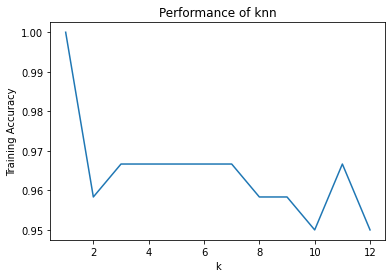

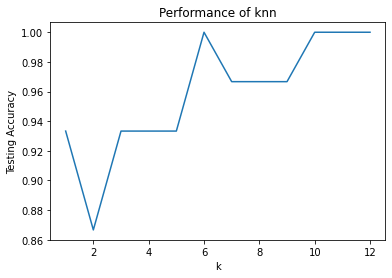

In [ ]:
# Unpack the iris dataset, from UCI Machine Learning Repository
iris = datasets.load_iris()
X = iris['data']
y = iris['target']
# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Preprocess data
ss = StandardScaler().fit(X_train)
X_train, X_test = ss.transform(X_train), ss.transform(X_test)
# Test knn model across varying ks
accuracies_test = []
accuracies_train = []
ks = range(1, 13)
for k in ks:
    knn = KNeighborsClassifier(k=k)
    knn.fit(X_train, y_train)
    accuracy_test = knn.evaluate(X_test, y_test)
    accuracies_test.append(accuracy_test)
    accuracy_train = knn.evaluate(X_train, y_train)
    accuracies_train.append(accuracy_train)
# Visualize accuracy vs. k
fig, ax = plt.subplots()
ax.plot(ks, accuracies_train)
ax.set(xlabel="k",
       ylabel="Training Accuracy",
       title="Performance of knn")
plt.show()

fig, ax = plt.subplots()
ax.plot(ks, accuracies_test)
ax.set(xlabel="k",
       ylabel="Testing Accuracy",
       title="Performance of knn")
plt.show()


# Chapter 1-2. Use scikit-learn library


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
accuracies_test=[]
accuracies_train=[]
for k in range(1,13):
  #by default, metric is an euclidean distance 
  # Refer to https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(X_train, y_train)
  accuracies_train.append(classifier.score(X_train, y_train))
  accuracies_test.append(classifier.score(X_test, y_test))

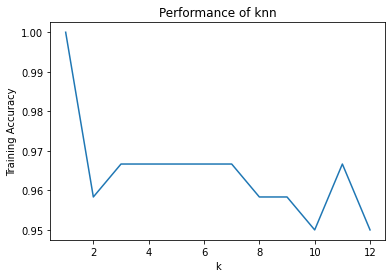

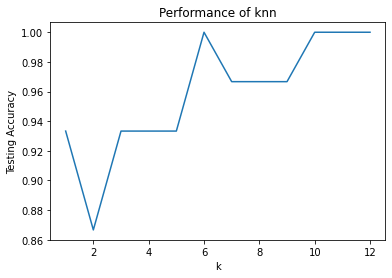

In [ ]:
# Visualize accuracy vs. k
fig, ax = plt.subplots()
ax.plot(ks, accuracies_train)
ax.set(xlabel="k",
       ylabel="Training Accuracy",
       title="Performance of knn")
plt.show()

fig, ax = plt.subplots()
ax.plot(ks, accuracies_test)
ax.set(xlabel="k",
       ylabel="Testing Accuracy",
       title="Performance of knn")
plt.show()